## 📊 Graficos_y_ajustes.ipynb

**Autor:** Johanna Atenea Carreon Baltazar  
**Contacto:** johannaatenea13@gmail.com 
**Fecha de última modificación:** junio de 2025

---

### 🎯 Objetivo

Visualizar y modelar las distribuciones de las **distancias entre genes de familais expandidas** utilizando los resultados obtenidos con los métodos de clasificación por **K-means** y **umbrales**.  
Se exploran dos tipos de medidas: **distancias en número de genes** y **distancias en kilobases (kb)**.

---

### 📥 Entradas requeridas

- `resultados_en_numero_genes_umbrales.pkl`: distancias entre genes duplicados clasificadas por umbrales (en número de genes).
- `resultados_en_numero_genes_k_means.pkl`: distancias clasificadas por K-means (en número de genes).
- `resultados_en_pb_umbrales.pkl`: distancias clasificadas por umbrales (en kilobases).
- `resultados_en_pb_k_means.pkl`: distancias clasificadas por K-means (en kilobases).

---

### 📤 Salidas generadas

- 4 histogramas (uno por cada combinación de método y tipo de medida).
- Gráficos complementarios:
  - QQ-plots para evaluar normalidad.
  - Boxplots para comparar distribuciones.
- Ajustes de modelos de distribución:
  - Se prueban distribuciones como **exponencial**, **gamma**, **log-normal**, **Weibull**, entre otras.
  - Se selecciona el modelo óptimo con base en pruebas estadísticas (como el test de Kolmogorov-Smirnov).

---

### 🧰 Librerías requeridas

```python
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma, lognorm, weibull_min, gaussian_kde, kstest



## Resultados en el caso en que las diferencias se calcularon en KB

In [3]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma, lognorm, weibull_min, gaussian_kde, kstest

### k-means

In [4]:
# Cargar el archivo .pkl
with open('resultados_en_pb_k_means.pkl', 'rb') as file:
 resultados_diferencias_k_means= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_k_means)  # Muestra una parte del contenido

{103690.82: [27.955, 492.574, 149.758, 242.835, 112.269, 18.475, 13.226, 159.211, 292.866, 49.606, 230.723, 150.844, 264.411, 301.786, 34.597, 130.045, 216.455, 180.321, 0.024, 1492.116, 14.825, 0.701, 296.858, 260.885, 128.426, 330.112, 0.619, 32.343, 729.804], 1472755.9: [359.549, 463.285, 45.696, 2.701, 243.312, 191.922, 268.811, 135.853, 272.953, 318.956, 769.342, 221.987, 83.298, 225.854, 452.11, 345.746, 0.397, 381.058, 589.569, 278.154, 145.539, 535.972, 400.784, 211.093, 331.648, 20.738, 9.871, 35.422, 165.268, 168.081], 1618022.9: [593.324, 372.309, 291.381, 539.154, 6.127, 0.791, 260.413, 70.723, 133.842, 992.659, 23.359, 7.17, 294.066, 338.139, 526.39, 543.869, 253.545, 0.511, 223.998, 532.004, 59.144, 40.601, 92.732, 52.284, 308.467, 455.155], 1647413.14: [26.995, 19.623, 132.43, 21.7, 225.579, 89.507, 210.768, 39.133, 227.249, 84.327, 0.079, 1022.45, 222.277, 502.796, 155.831, 110.864, 30.913, 52.634, 0.053, 294.353, 793.698, 583.782, 360.506, 0.161, 449.316], 1869241.2: [

### umbrales

In [5]:
# Cargar el archivo .pkl
with open('resultados_en_pb_umbrales.pkl', 'rb') as file:
 resultados_diferencias_umbrales= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_umbrales)  # Muestra una parte del contenido

{103690.82: [89.533, 0.2, 208.644, 108.74, 196.619, 27.955, 492.574, 149.758, 242.835, 112.269, 18.475, 13.226, 159.211, 292.866, 27.119, 20.781, 230.723, 150.844, 264.411, 79.48, 220.627, 34.597, 45.32, 83.058, 131.832, 82.416, 180.321, 0.024, 2.508, 81.041, 486.333, 98.59, 504.895, 77.727, 227.405, 14.825, 0.701, 296.858, 58.118, 200.797, 46.068, 80.79, 87.291, 27.692, 10.869, 183.562, 49.153, 116.26], 1472755.9: [335.328, 97.888, 388.224, 45.696, 2.701, 243.312, 6.6, 183.094, 25.736, 110.02, 127.24, 71.173, 28.039, 33.313, 138.782, 0.166, 69.417, 59.041, 315.897, 117.872, 19.129, 486.946, 34.609, 80.359, 333.404, 225.854, 452.11, 345.746, 383.371, 83.416, 253.101, 13.63, 233.428, 73.801, 202.698, 145.539, 332.447, 201.309, 163.825, 77.253, 156.381, 7.296, 202.196, 331.648, 20.738, 9.871, 35.422, 165.268, 13.13, 152.636], 1618022.9: [217.387, 173.778, 107.559, 69.566, 22.752, 276.738, 291.381, 238.165, 296.308, 0.987, 6.127, 0.791, 61.998, 12.595, 182.354, 70.723, 889.946, 233.131, 2

## Diferencias duplicadas entre genes duplicados consecutivos contados en KB

### k-means

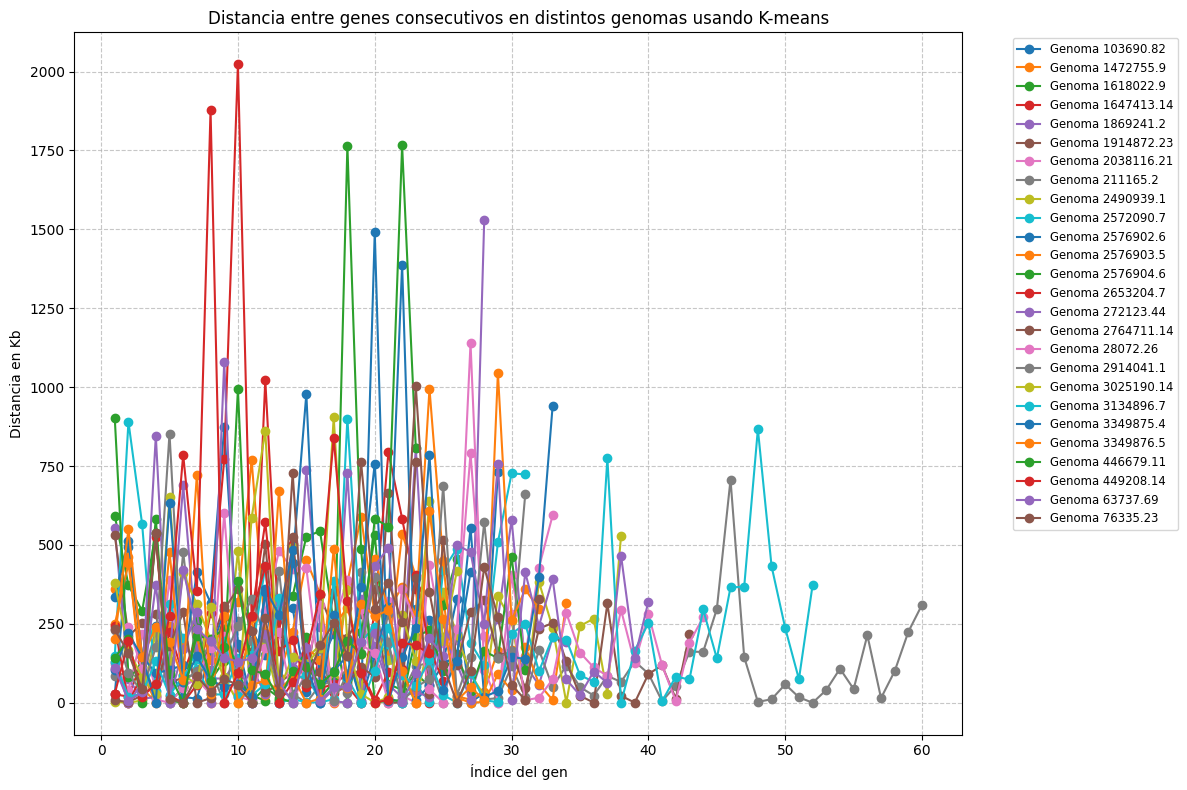

In [6]:
plt.figure(figsize=(12, 8))
# Crear un gráfico combinando las diferencias de todos los genomas
for id_genoma, diferencias in resultados_diferencias_k_means.items():
    plt.plot(range(1, len(diferencias) + 1), diferencias, marker='o', linestyle='-', label=f'Genoma {id_genoma}')

# Configuración del gráfico
plt.title('Distancia entre genes consecutivos en distintos genomas usando K-means')
plt.xlabel('Índice del gen')
plt.ylabel('Distancia en Kb')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Coloca la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta para evitar que la leyenda se sobreponga

# Mostrar el gráfico
plt.show()

### umbrales

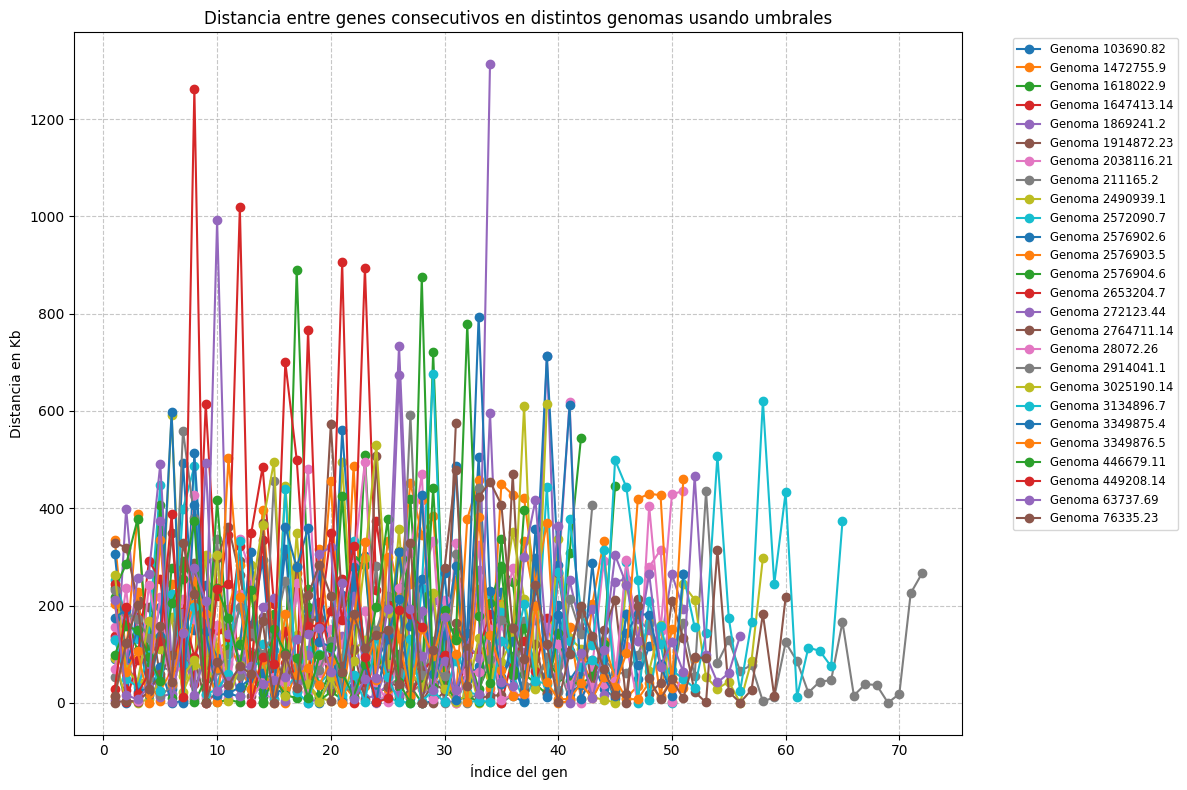

In [9]:
plt.figure(figsize=(12, 8))
# Crear un gráfico combinando las diferencias de todos los genomas
for id_genoma, diferencias in resultados_diferencias_umbrales.items():
    plt.plot(range(1, len(diferencias) + 1), diferencias, marker='o', linestyle='-', label=f'Genoma {id_genoma}')

# Configuración del gráfico
plt.title('Distancia entre genes consecutivos en distintos genomas usando umbrales')
plt.xlabel('Índice del gen')
plt.ylabel('Distancia en Kb')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Coloca la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta para evitar que la leyenda se sobreponga

# Mostrar el gráfico
plt.show()

## Histograma de las diferencias

### k-means

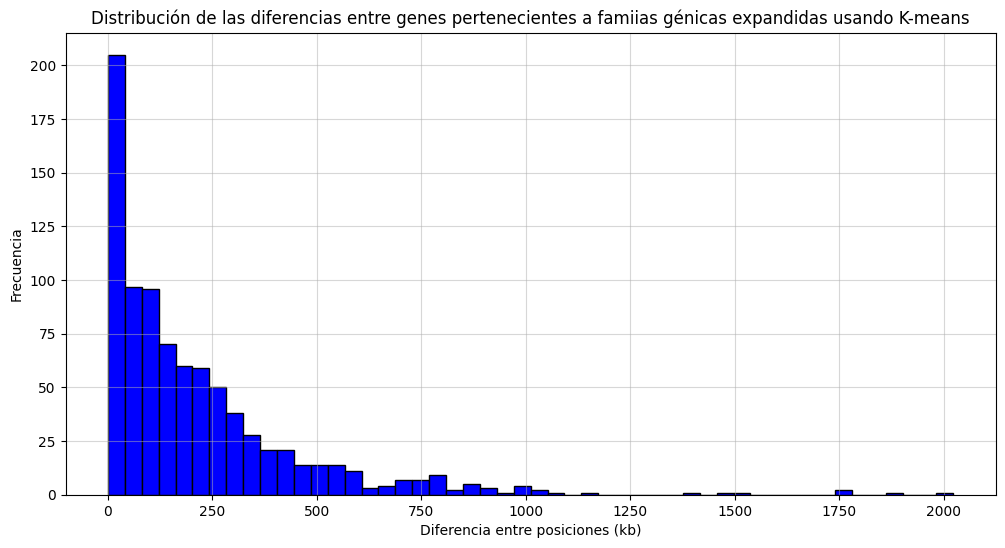

In [34]:
import matplotlib.pyplot as plt

# Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_k_means.values() for d in diferencias_genoma]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=50, color='blue', edgecolor='black')
plt.title("Distribución de las diferencias entre genes pertenecientes a famiias génicas expandidas usando K-means")
plt.xlabel("Diferencia entre posiciones (kb)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)
# Guardar la figura como imagen PNG
plt.savefig("resultados/histograma_diferencias_kmeans_pb_sin_transf.png", dpi=300, bbox_inches='tight')
plt.show()

### umbrales

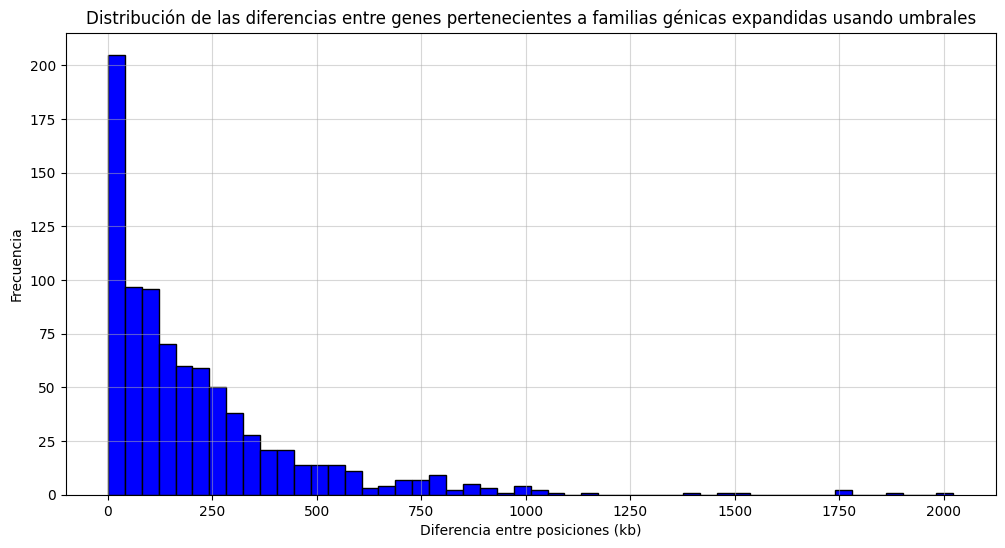

In [35]:
import os
# Obtener el directorio actual del notebook
current_dir = os.getcwd()
filename = "histograma_diferencias_genes.png"
full_path = os.path.join(current_dir, filename)

# Volver a crear y guardar la figura en ese directorio
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=50, color='blue', edgecolor='black')
plt.title("Distribución de las diferencias entre genes pertenecientes a familias génicas expandidas usando umbrales")
plt.xlabel("Diferencia entre posiciones (kb)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)
plt.savefig(full_path)
plt.show()
# Guardar la figura como imagen PNG
plt.savefig("resultados/histograma_diferencias_pb_umbrales.png", dpi=300, bbox_inches='tight')
plt.close()


## Histograma con ajustes

### k-means


Resultados del ajuste:

Distribución          AIC        KS-Stat      KS-pvalue                    Parámetros
-------------------------------------------------------------------------------------
Exponencial      10873.42         0.0881         0.0000                0.024, 213.541
Gamma            10750.19         0.1249         0.0000         0.690, 0.024, 230.466
Log-normal       10980.94         0.0781         0.0001        1.262, -9.460, 118.369
Weibull          10732.27         0.0672         0.0009         0.756, 0.024, 229.094


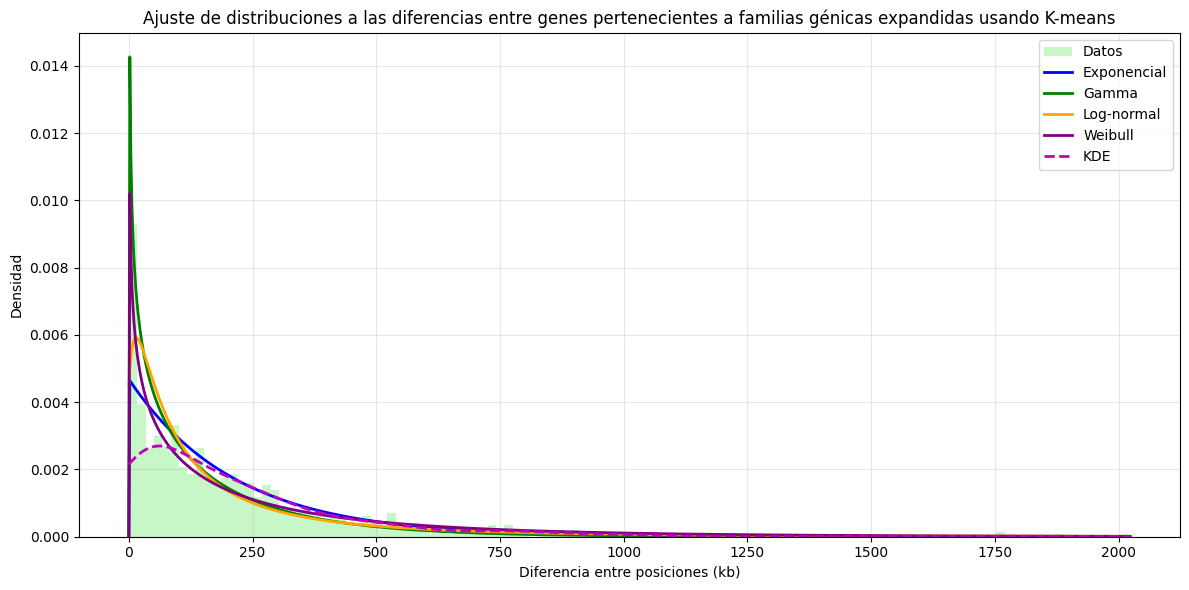

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma, lognorm, weibull_min, gaussian_kde, kstest

# Suponiendo que ya tienes esto:
todas_las_diferencias = [d for diferencias_genoma in resultados_diferencias_k_means.values() for d in diferencias_genoma]
datos_k_means = np.array(todas_las_diferencias)

# Rango para graficar
x = np.linspace(0, max(datos_k_means), 1000)

# KDE
kde = gaussian_kde(datos_k_means)
kde_pdf = kde(x)

# Diccionario de distribuciones a evaluar
distribuciones = {
    "Exponencial": expon,
    "Gamma": gamma,
    "Log-normal": lognorm,
    "Weibull": weibull_min
}

# Resultados
resultados = {}

# Evaluar cada distribución
for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(datos_k_means)
        pdf = dist.pdf(x, *params)
        loglik = np.sum(dist.logpdf(datos_k_means, *params))
        k = len(params)
        aic = 2 * k - 2 * loglik
        ks_stat, ks_p = kstest(datos_k_means, dist.name, args=params)

        resultados[nombre] = {
            "params": params,
            "pdf": pdf,
            "loglik": loglik,
            "aic": aic,
            "ks_stat": ks_stat,
            "ks_pvalue": ks_p
        }

    except Exception as e:
        print(f"Error con {nombre}: {e}")

# Imprimir tabla de resultados
print("\nResultados del ajuste:\n")
print(f"{'Distribución':<15}{'AIC':>10}{'KS-Stat':>15}{'KS-pvalue':>15}{'Parámetros':>30}")
print("-" * 85)
for nombre, res in resultados.items():
    params_str = ", ".join([f"{p:.3f}" for p in res['params']])
    print(f"{nombre:<15}{res['aic']:>10.2f}{res['ks_stat']:>15.4f}{res['ks_pvalue']:>15.4f}{params_str:>30}")


# Graficar
plt.figure(figsize=(12, 6))
plt.hist(datos_k_means, bins=120, alpha=0.5, color='lightgreen', density=True, label='Datos')

# Graficar cada PDF ajustada
colores = ['b', 'g', 'orange', 'purple']
#colores = ['white', 'white', 'white', 'purple']
for (nombre, res), color in zip(resultados.items(), colores):
    plt.plot(x, res['pdf'], label=f"{nombre}", lw=2, color=color)

# Graficar KDE
plt.plot(x, kde_pdf, 'm--', lw=2, label='KDE')

plt.title("Ajuste de distribuciones a las diferencias entre genes pertenecientes a familias génicas expandidas usando K-means")
plt.xlabel("Diferencia entre posiciones (kb)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("resultados/ajuste_dist_diferencias_genes_pb_k_means.png", dpi=300)
plt.show()

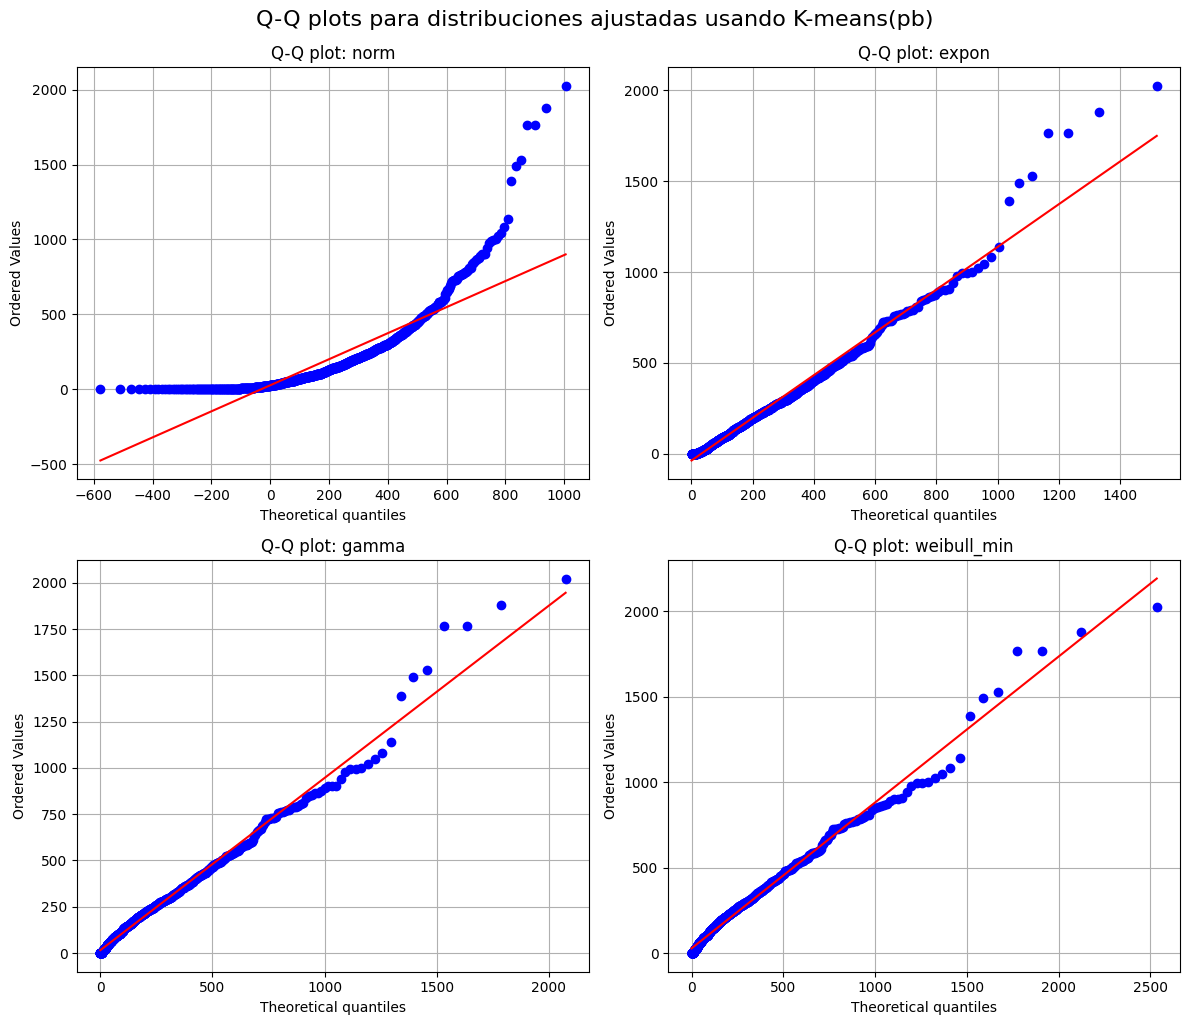

In [11]:
# Q-Q plots para las distribuciones ajustadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dist_name in enumerate(dist_names):
    ax = axes[i]
    dist = getattr(stats, dist_name)

    try:
        # Ajuste con floc=0 si aplica
        if dist_name in ['gamma', 'weibull_min']:
            params = dist.fit(datos_k_means, floc=0)
        else:
            params = dist.fit(datos_k_means)

        # Q-Q plot
        stats.probplot(datos_k_means, dist=dist, sparams=params, plot=ax)
        ax.set_title(f"Q-Q plot: {dist_name}", fontsize=12)
        ax.grid(True)
    except Exception as e:
        ax.set_title(f"{dist_name} - Error")
        ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Q-Q plots para distribuciones ajustadas usando K-means(pb)", fontsize=16, y=1.02)

# GUARDAR COMO IMAGEN
plt.savefig("resultados/qq_plots_distribuciones_kmeans_pb.png", dpi=300, bbox_inches='tight')  # PNG
# También puedes usar PDF: plt.savefig("qq_plots.pdf")

plt.show()


### umbrales


Resultados del ajuste:

Distribución          AIC        KS-Stat      KS-pvalue                    Parámetros
-------------------------------------------------------------------------------------
Exponencial      14771.09         0.0574         0.0006                0.024, 147.398
Gamma            14704.15         0.1214         0.0000         0.684, 0.023, 169.543
Log-normal       14938.64         0.0571         0.0006         1.112, -9.506, 93.208
Weibull          14638.39         0.0437         0.0174         0.812, 0.024, 138.702


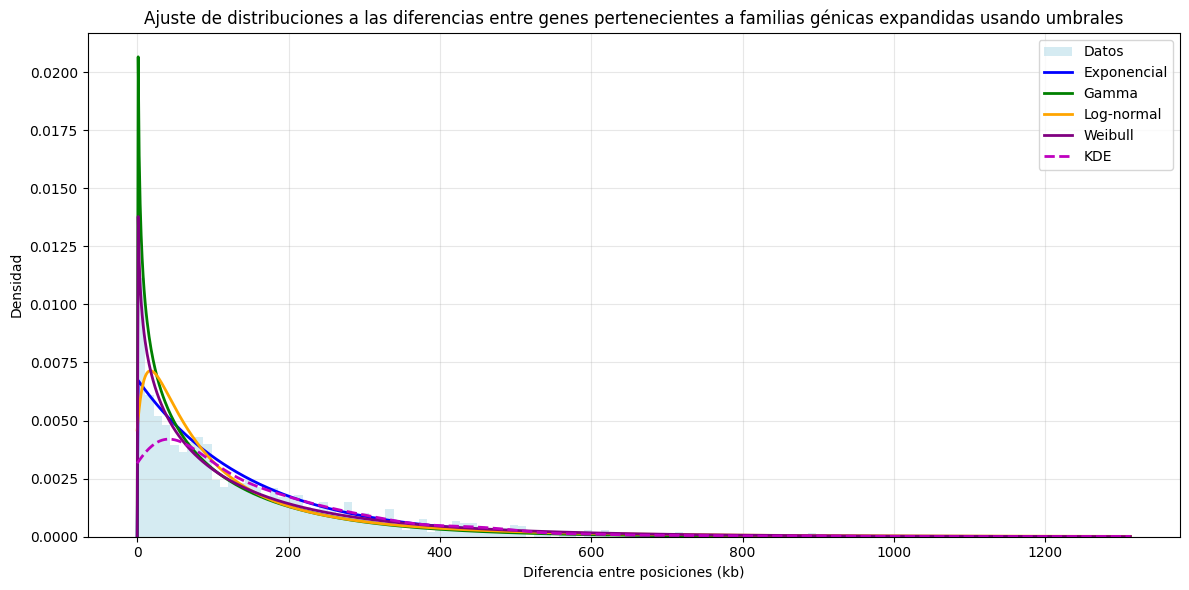

In [37]:
# Suponiendo que ya tienes esto:
todas_las_diferencias = [d for diferencias_genoma in resultados_diferencias_umbrales.values() for d in diferencias_genoma]
datos_umbrales = np.array(todas_las_diferencias)

# Rango para graficar
x = np.linspace(0, max(datos_umbrales), 1000)

# KDE
kde = gaussian_kde(datos_umbrales)
kde_pdf = kde(x)

# Diccionario de distribuciones a evaluar
distribuciones = {
    "Exponencial": expon,
    "Gamma": gamma,
    "Log-normal": lognorm,
    "Weibull": weibull_min
}

# Resultados
resultados = {}

# Evaluar cada distribución
for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(datos_umbrales)
        pdf = dist.pdf(x, *params)
        loglik = np.sum(dist.logpdf(datos_umbrales, *params))
        k = len(params)
        aic = 2 * k - 2 * loglik
        ks_stat, ks_p = kstest(datos_umbrales, dist.name, args=params)

        resultados[nombre] = {
            "params": params,
            "pdf": pdf,
            "loglik": loglik,
            "aic": aic,
            "ks_stat": ks_stat,
            "ks_pvalue": ks_p
        }

    except Exception as e:
        print(f"Error con {nombre}: {e}")

# Imprimir tabla de resultados con parámetros
print("\nResultados del ajuste:\n")
print(f"{'Distribución':<15}{'AIC':>10}{'KS-Stat':>15}{'KS-pvalue':>15}{'Parámetros':>30}")
print("-" * 85)
for nombre, res in resultados.items():
    params_str = ", ".join([f"{p:.3f}" for p in res['params']])
    print(f"{nombre:<15}{res['aic']:>10.2f}{res['ks_stat']:>15.4f}{res['ks_pvalue']:>15.4f}{params_str:>30}")


# Graficar
plt.figure(figsize=(12, 6))
plt.hist(datos_umbrales, bins=120, alpha=0.5, color='lightblue', density=True, label='Datos')

# Graficar cada PDF ajustada
colores = ['b', 'g', 'orange', 'purple']
#colores = ['white', 'white', 'white', 'white']
for (nombre, res), color in zip(resultados.items(), colores):
    plt.plot(x, res['pdf'], label=f"{nombre}", lw=2, color=color)

# Graficar KDE
plt.plot(x, kde_pdf, 'm--', lw=2, label='KDE')

plt.title("Ajuste de distribuciones a las diferencias entre genes pertenecientes a familias génicas expandidas usando umbrales")
plt.xlabel("Diferencia entre posiciones (kb)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("resultados/ajuste_dist_diferencias_genes_pb_umbrales.png", dpi=150)
plt.show()

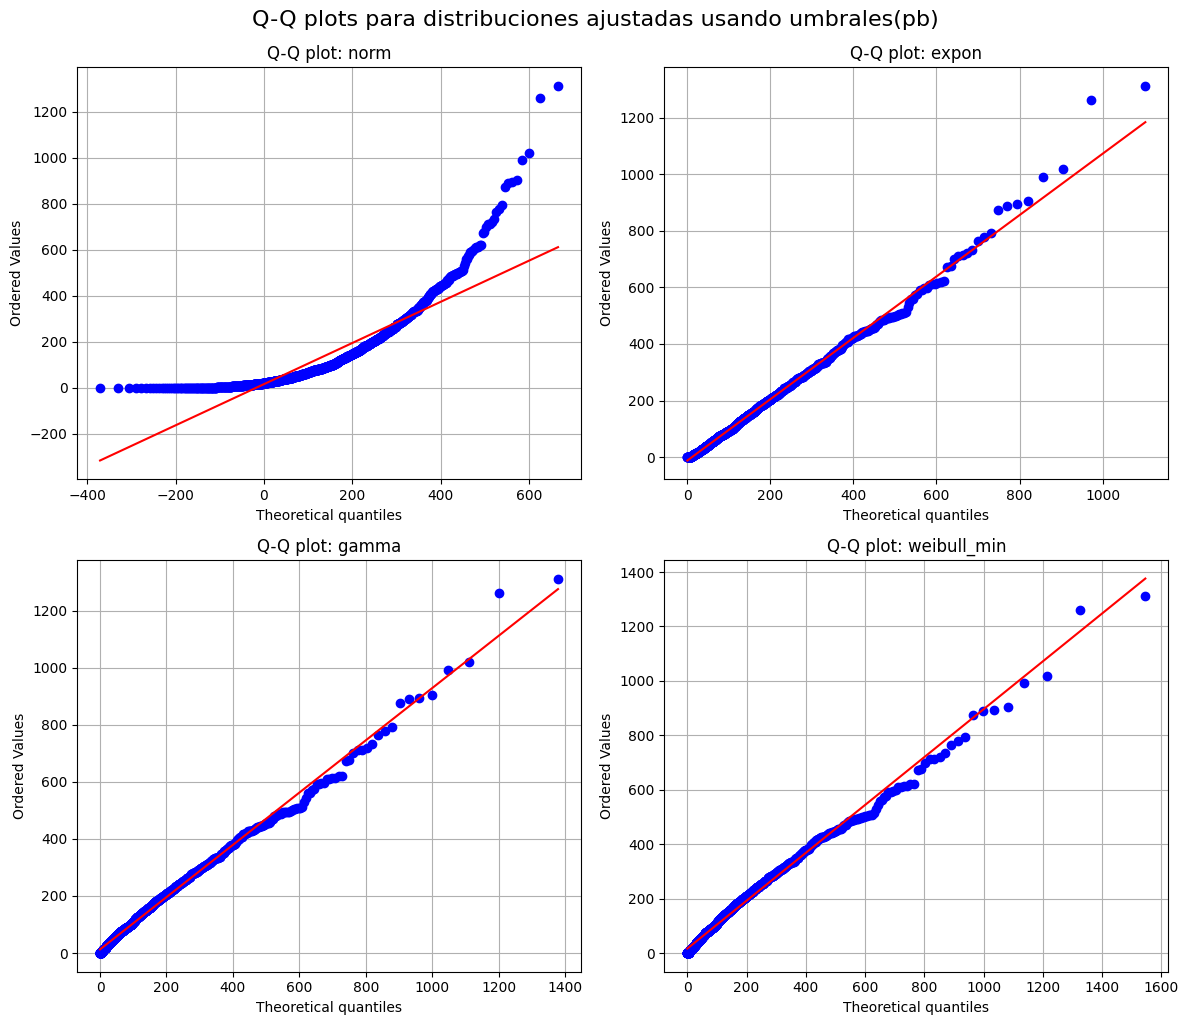

In [38]:
# Q-Q plots para las distribuciones ajustadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dist_name in enumerate(dist_names):
    ax = axes[i]
    dist = getattr(stats, dist_name)

    try:
        # Ajuste con floc=0 si aplica
        if dist_name in ['gamma', 'weibull_min']:
            params = dist.fit(datos_umbrales, floc=0)
        else:
            params = dist.fit(datos_umbrales)

        # Q-Q plot
        stats.probplot(datos_umbrales, dist=dist, sparams=params, plot=ax)
        ax.set_title(f"Q-Q plot: {dist_name}", fontsize=12)
        ax.grid(True)
    except Exception as e:
        ax.set_title(f"{dist_name} - Error")
        ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Q-Q plots para distribuciones ajustadas usando umbrales(pb)", fontsize=16, y=1.02)
plt.savefig("resultados//qq_plots_umbrales_pb.png", dpi =150)
plt.show()

## Boxplot por genoma

### K-means

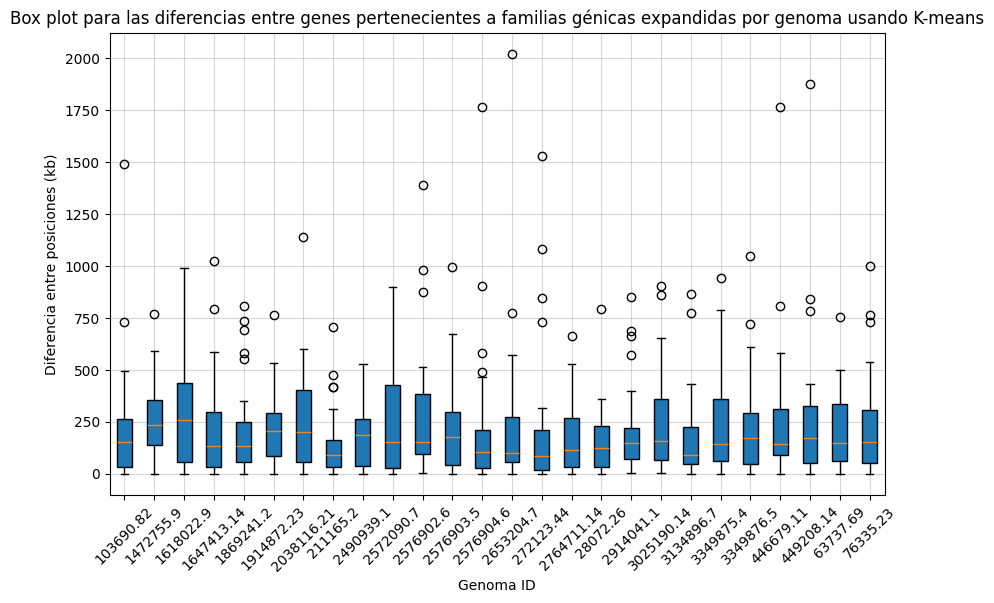

In [39]:
# Crear el box plot
plt.figure(figsize=(10, 6))
plt.boxplot(resultados_diferencias_k_means.values(), vert=True, patch_artist=True)

# Personalización del gráfico
plt.xticks(range(1, len(resultados_diferencias_k_means) + 1), resultados_diferencias_k_means.keys(), rotation=45)
plt.title("Box plot para las diferencias entre genes pertenecientes a familias génicas expandidas por genoma usando K-means")
plt.xlabel("Genoma ID")
plt.ylabel("Diferencia entre posiciones (kb)")
plt.grid(True, alpha=0.5)

# Mostrar el gráfico
plt.savefig("resultados/boxplot_k_meas_pb.png",dpi =150)
plt.show()

## umbrales

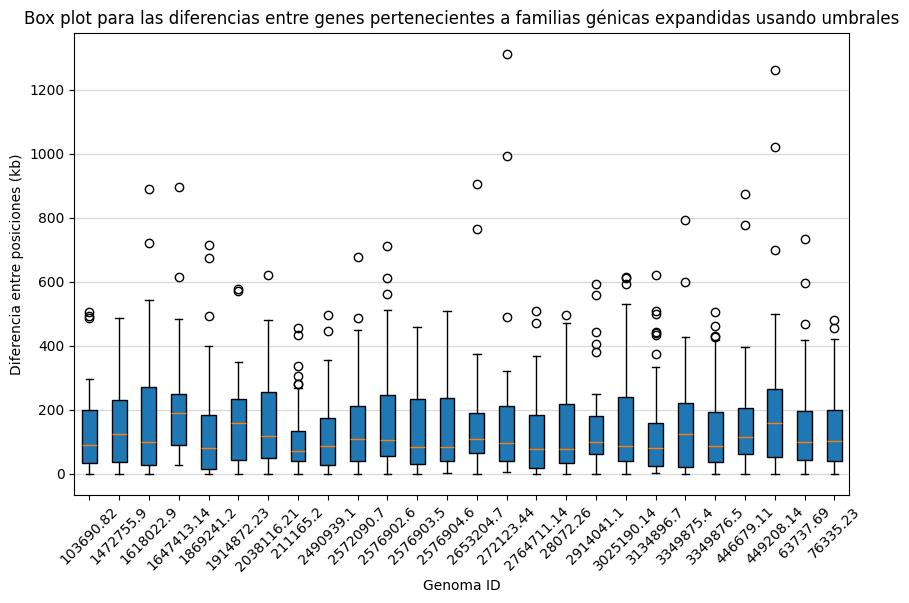

In [40]:
# Crear el box plot
plt.figure(figsize=(10, 6))
plt.boxplot(resultados_diferencias_umbrales.values(), vert=True, patch_artist=True)
#plt.ylim(bottom=np.percentile(diferencias, 5), top=np.percentile(diferencias, 95))

# Personalización del gráfico
plt.xticks(range(1, len(resultados_diferencias_umbrales) + 1), resultados_diferencias_umbrales.keys(), rotation=45)
plt.title("Box plot para las diferencias entre genes pertenecientes a familias génicas expandidas usando umbrales")
plt.xlabel("Genoma ID")
plt.ylabel("Diferencia entre posiciones (kb)")
plt.grid(axis="y", alpha=0.5)
# Guardar imagen
plt.savefig("resultados/boxplot_umbrales_pb.png",dpi =150)
# Mostrar el gráfico
plt.show()

## Resultados en el caso de que las diferencias se calcularon en número de genes

### Importar datos

### K-means

In [20]:
# Cargar el archivo .pkl
with open('resultados_en_numero_genes_k_means.pkl', 'rb') as file:
 resultados_diferencias_num_genes_k_means= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_num_genes_k_means)  # Muestra una parte del contenido

{2490939.1: [4, 1, 12, 169, 105, 385, 315, 186, 71, 440, 3, 185, 6, 461, 132, 163, 69, 326, 32, 214, 123, 73, 1, 177, 339, 198, 81, 26, 326, 222, 13, 333, 212, 2, 237, 238, 34, 496], 103690.82: [28, 455, 138, 226, 119, 24, 17, 137, 255, 41, 210, 145, 228, 248, 20, 125, 205, 182, 1, 1386, 12, 3, 291, 231, 123, 288, 2, 30, 684], 211165.2: [78, 89, 73, 215, 14, 453, 114, 101, 2, 231, 194, 41, 405, 30, 1, 51, 64, 26, 432, 123, 258, 34, 113, 131, 2, 214, 106, 13, 18, 130, 18, 175, 56, 114, 50, 29, 93, 68, 144, 101, 3, 57, 177, 165, 302, 707, 142, 4, 13, 53, 18, 1, 39, 125, 40, 206, 14, 101, 241, 322], 1472755.9: [342, 438, 47, 6, 261, 164, 277, 116, 266, 252, 774, 219, 84, 227, 442, 340, 2, 418, 564, 285, 135, 525, 402, 152, 264, 24, 8, 38, 147, 180], 2576904.6: [819, 66, 123, 565, 2, 53, 204, 220, 224, 94, 3, 41, 21, 1, 182, 11, 71, 1688, 462, 5, 5, 10, 217, 220, 104, 132, 39, 157, 156, 427, 111], 2764711.14: [6, 3, 27, 52, 164, 277, 1, 15, 270, 370, 230, 34, 51, 479, 63, 87, 320, 58, 109,

### umbrales

In [21]:
# Cargar el archivo .pkl
with open('resultados_en_numero_genes_umbrales.pkl', 'rb') as file:
 resultados_diferencias_num_genes_umbrales= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_num_genes_umbrales)  # Muestra una parte del contenido

{2490939.1: [69, 4, 1, 12, 44, 125, 22, 83, 287, 98, 113, 128, 260, 71, 32, 408, 139, 42, 8, 5, 461, 104, 118, 73, 69, 326, 32, 79, 194, 45, 19, 73, 1, 3, 174, 339, 198, 81, 26, 326, 123, 87, 12, 11, 2, 206, 137, 60, 142, 2, 237, 192, 46, 34, 52, 1, 65, 309], 103690.82: [91, 1, 188, 91, 196, 28, 455, 138, 226, 119, 24, 17, 137, 255, 22, 19, 210, 145, 228, 78, 170, 20, 46, 79, 114, 91, 182, 1, 3, 80, 446, 88, 478, 82, 209, 12, 3, 291, 59, 172, 43, 80, 64, 32, 8, 172, 44, 117], 211165.2: [59, 70, 36, 53, 73, 71, 146, 12, 127, 326, 52, 62, 101, 2, 425, 41, 239, 197, 141, 30, 103, 299, 123, 258, 34, 53, 23, 37, 131, 2, 320, 12, 19, 130, 1, 17, 175, 170, 79, 81, 12, 68, 144, 101, 60, 63, 114, 165, 75, 59, 168, 60, 461, 56, 130, 64, 78, 4, 13, 111, 100, 25, 40, 36, 170, 14, 40, 39, 1, 21, 241, 271], 1472755.9: [320, 96, 364, 47, 6, 261, 6, 158, 15, 133, 129, 70, 23, 23, 137, 1, 77, 51, 249, 106, 24, 507, 39, 74, 330, 227, 442, 340, 420, 98, 216, 14, 236, 65, 220, 135, 329, 196, 173, 79, 150,

### Diferencias entre genes duplicados consecutivos contadas en número de genes

### K-means

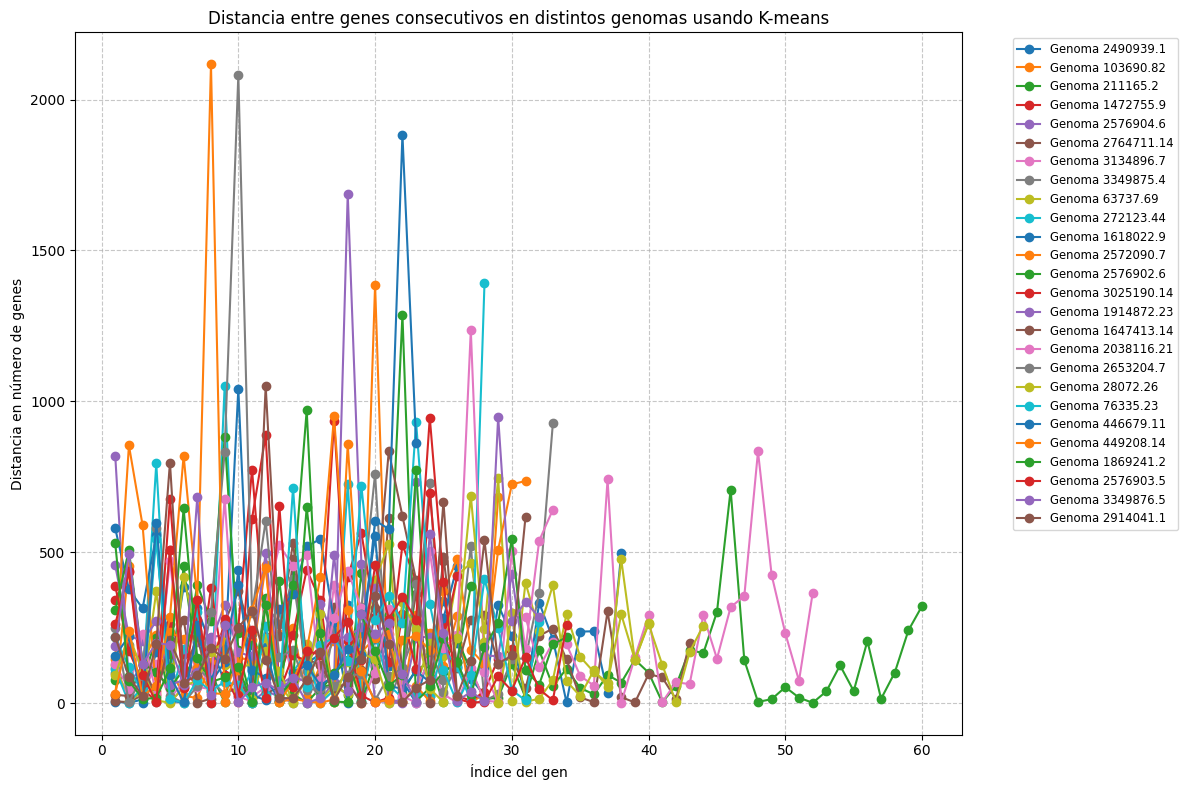

In [28]:
plt.figure(figsize=(12, 8))
for id_genoma, diferencias in resultados_diferencias_num_genes_k_means.items():
    plt.plot(range(1, len(diferencias) + 1), diferencias, marker='o', linestyle='-', label=f'Genoma {id_genoma}')

# Configuración del gráfico
plt.title('Distancia entre genes consecutivos en distintos genomas usando K-means')
plt.xlabel('Índice del gen')
plt.ylabel('Distancia en número de genes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Coloca la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta para evitar que la leyenda se sobreponga
# Mostrar el gráfico
plt.show()

### umbrales

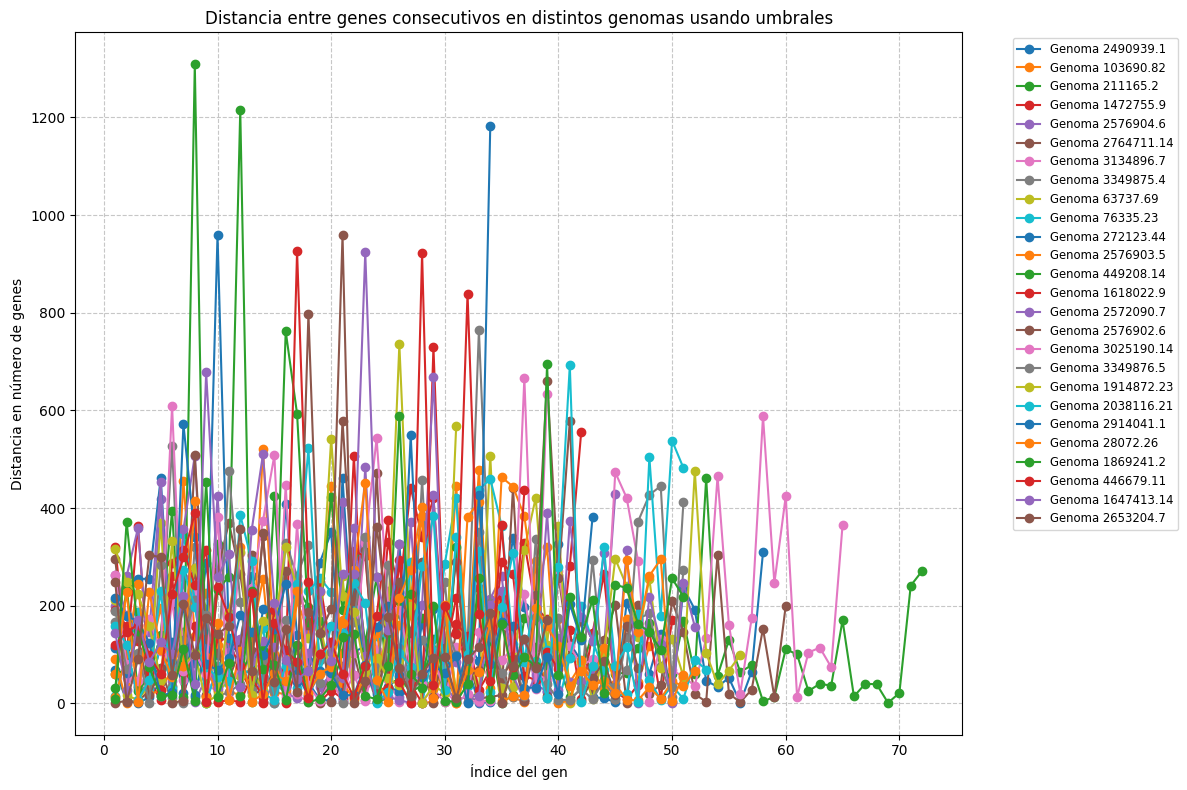

In [29]:
plt.figure(figsize=(12, 8))
for id_genoma, diferencias in resultados_diferencias_num_genes_umbrales.items():
    plt.plot(range(1, len(diferencias) + 1), diferencias, marker='o', linestyle='-', label=f'Genoma {id_genoma}')

# Configuración del gráfico
plt.title('Distancia entre genes consecutivos en distintos genomas usando umbrales')
plt.xlabel('Índice del gen')
plt.ylabel('Distancia en número de genes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Coloca la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta para evitar que la leyenda se sobreponga
# Mostrar el gráfico
plt.show()

### K-means

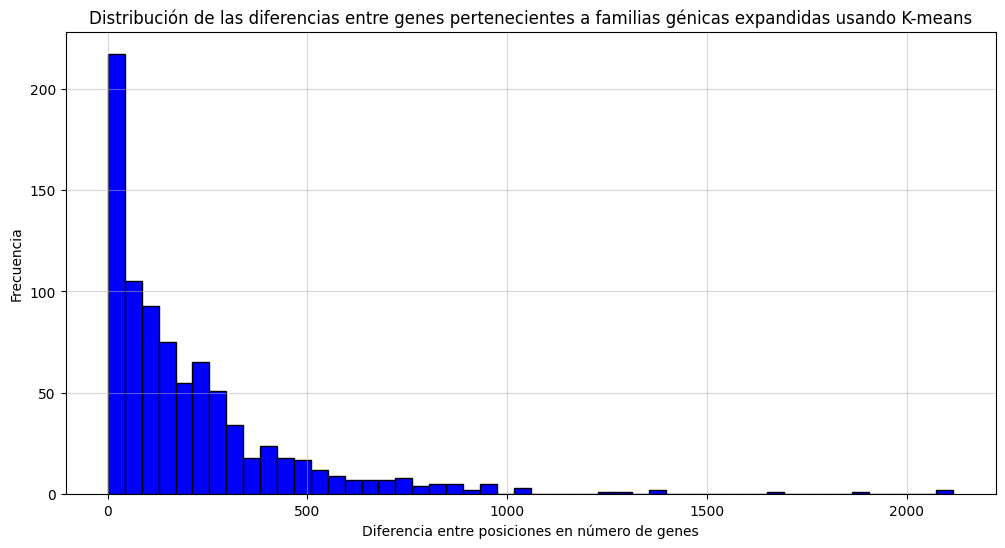

In [41]:
# Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_k_means.values() for d in diferencias_genoma]


# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=50, color='blue', edgecolor='black')
plt.title("Distribución de las diferencias entre genes pertenecientes a familias génicas expandidas usando K-means")
plt.xlabel("Diferencia entre posiciones en número de genes")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)
plt.savefig("resultados/histograma_num_genes_K_means.png",dpi =150)
plt.show()

### umbrales

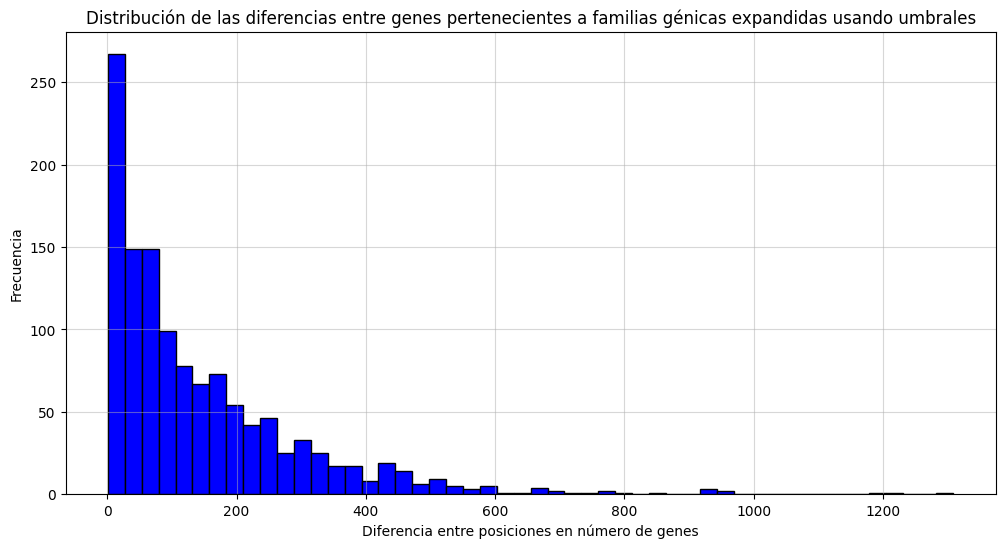

In [42]:
# Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_umbrales.values() for d in diferencias_genoma]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(diferencias, bins=50, color='blue', edgecolor='black')
plt.title("Distribución de las diferencias entre genes pertenecientes a familias génicas expandidas usando umbrales")
plt.xlabel("Diferencia entre posiciones en número de genes")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.5)

# Guardar como imagen
plt.savefig("resultados/histograma_diferencias_genes_umbrales_num_genes.png", dpi=150, bbox_inches='tight')
plt.show()


## Histograma con ajustes

### K-means


Resultados del ajuste:

Distribución      AIC  KS-Statistic  KS-pvalue             Parámetros
       gamma 10754.60        0.0415     0.1025  0.691, 0.000, 303.141
 weibull_min 10765.16        0.0498     0.0278  0.796, 0.000, 185.855
       expon 10833.53        0.0906     0.0000         1.000, 208.611
     lognorm 10929.79        0.0788     0.0000 1.301, -6.989, 111.459


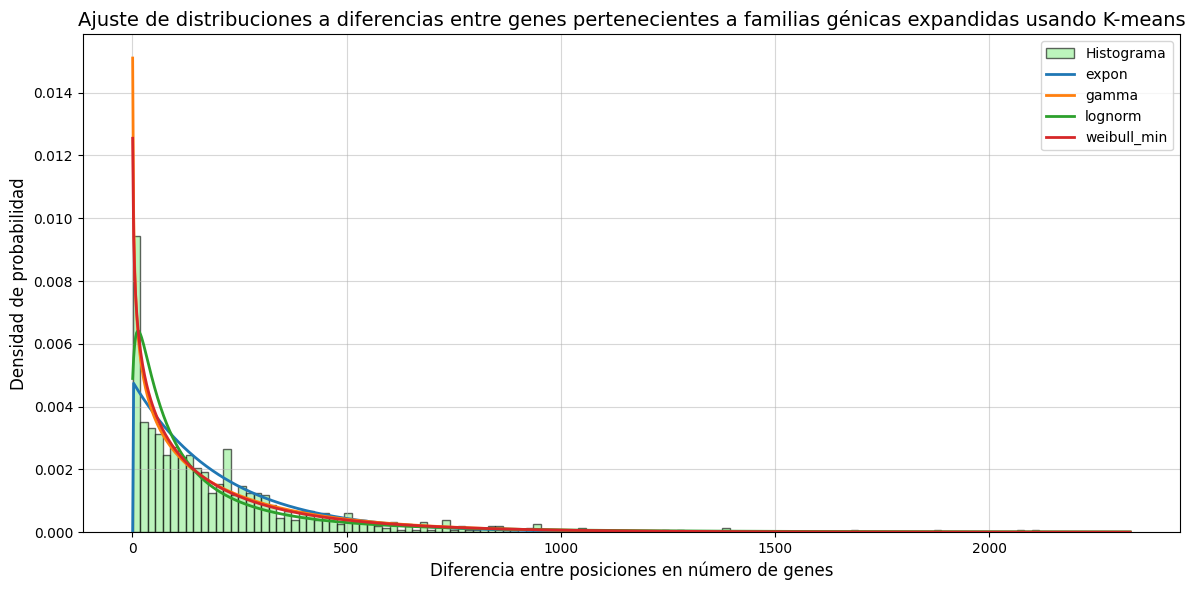

In [43]:
# Crear la lista de diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_k_means.values() for d in diferencias_genoma]
diferencias = np.array(diferencias)

# Filtrar valores no numéricos o extremos (si aplica)
diferencias = diferencias[np.isfinite(diferencias)]
diferencias = diferencias[diferencias > 0]  # Evita problemas con lognorm y gamma

# Definir distribuciones a probar
dist_names = ['expon', 'gamma', 'lognorm', 'weibull_min']
x = np.linspace(min(diferencias) * 0.9, max(diferencias) * 1.1, 1000)  # Expande ligeramente el rango de x

# Diccionario para almacenar los resultados
results = []

# Crear el histograma normalizado
plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(diferencias, bins=120, density=True, color='lightgreen', edgecolor='black', alpha=0.6, label="Histograma")

# Ajustar cada distribución y graficar
for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    
    # Ajuste de parámetros (fuerza loc=0 para gamma y weibull_min si es necesario)
    if dist_name in ['gamma', 'weibull_min']:
        params = dist.fit(diferencias, floc=0)
    else:
        params = dist.fit(diferencias)

    # Validar si los parámetros generan valores razonables
    pdf_fitted = dist.pdf(x, *params)
    if np.any(np.isnan(pdf_fitted)) or np.max(pdf_fitted) > 10 * np.max(count): 
        print(f"Advertencia: {dist_name} tiene un ajuste no válido")
        continue
    
    # Graficar la distribución ajustada
    plt.plot(x, pdf_fitted, label=f"{dist_name}", linewidth=2)

    # Log-verosimilitud para AIC
    loglik = np.sum(dist.logpdf(diferencias, *params))
    k = len(params)  # Número de parámetros
    aic = 2 * k - 2 * loglik

    # Prueba de Kolmogorov-Smirnov
    ks_stat, ks_pvalue = stats.kstest(diferencias, dist_name, args=params)

    # Almacenar los resultados en el diccionario
    results.append({
        "Distribución": dist_name,
        "AIC": round(aic, 2),
        "KS-Statistic": round(ks_stat, 4),
        "KS-pvalue": round(ks_pvalue, 4),
        "Parámetros": ", ".join([f"{p:.3f}" for p in params])  # <<< Convertimos los parámetros a string legible
    })

# Mostrar resultados ordenados por AIC
df_resultados = pd.DataFrame(results).sort_values("AIC")
print("\nResultados del ajuste:\n")
print(df_resultados.to_string(index=False))  # <<< Mostramos como tabla sin el índice

# Mejorar la visualización
plt.title("Ajuste de distribuciones a diferencias entre genes pertenecientes a familias génicas expandidas usando K-means", fontsize=14)
plt.xlabel("Diferencia entre posiciones en número de genes", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig("resultados/ajuste_num_genes_k_means.png",dpi =150)
plt.show()

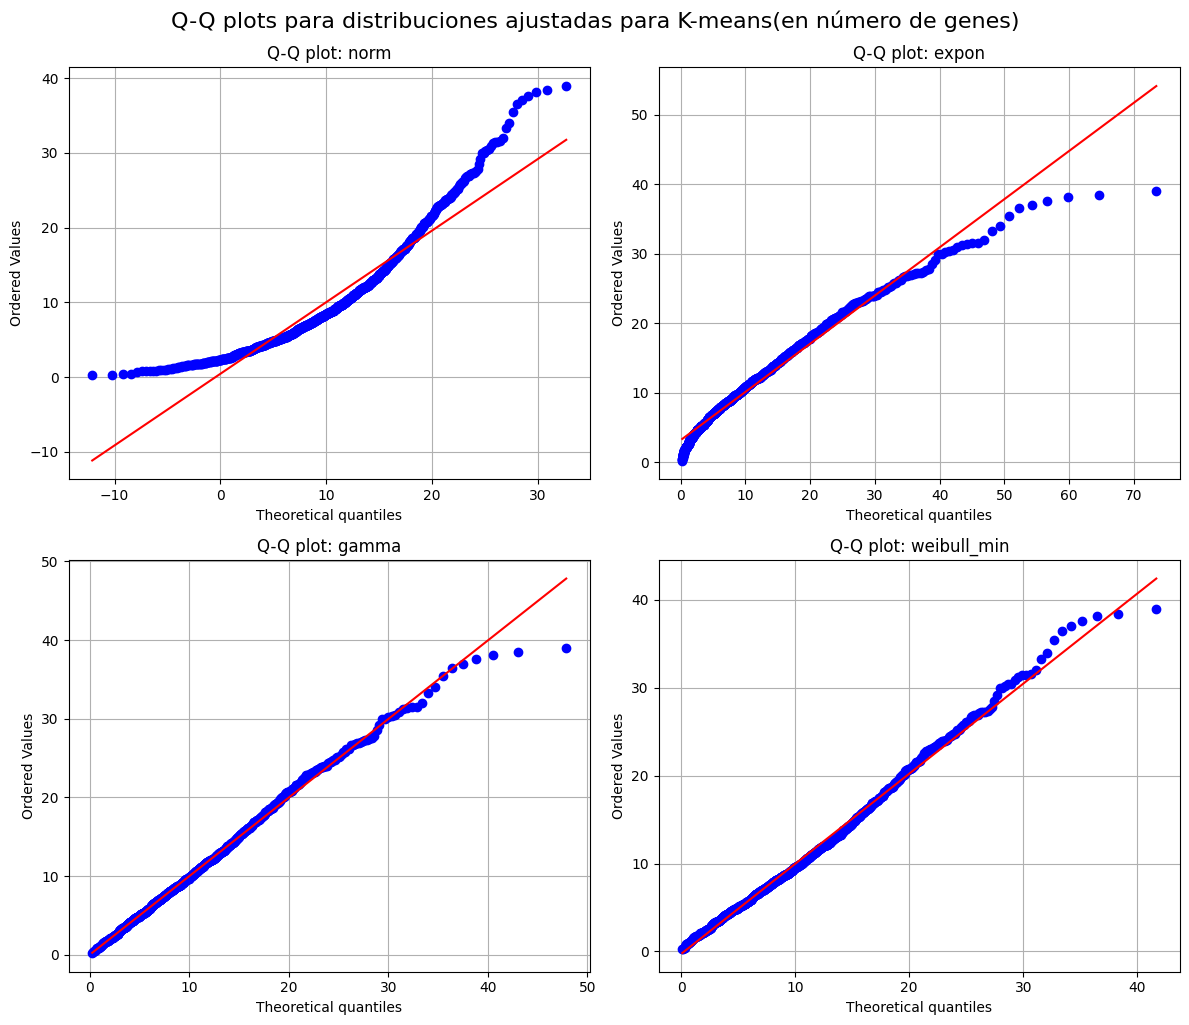

In [33]:
# Q-Q plots para las distribuciones ajustadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dist_name in enumerate(dist_names):
    ax = axes[i]
    dist = getattr(stats, dist_name)

    try:
        # Ajuste con floc=0 si aplica
        if dist_name in ['gamma', 'weibull_min']:
            params = dist.fit(diferencias, floc=0)
        else:
            params = dist.fit(diferencias)

        # Q-Q plot
        stats.probplot(diferencias, dist=dist, sparams=params, plot=ax)
        ax.set_title(f"Q-Q plot: {dist_name}", fontsize=12)
        ax.grid(True)
    except Exception as e:
        ax.set_title(f"{dist_name} - Error")
        ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Q-Q plots para distribuciones ajustadas para K-means(en número de genes)", fontsize=16, y=1.02)
plt.savefig("resultados/qqplots_num_genes_k_means.png",dpi =150)
plt.show()

### umbrales

  Distribución       AIC  KS-Statistic  KS-pvalue               Parámetros
1        gamma  14692.99        0.0247     0.4330    [0.798, 0.0, 182.017]
3  weibull_min  14698.80        0.0297     0.2220    [0.873, 0.0, 136.058]
0        expon  14718.73        0.0656     0.0000           [1.0, 144.299]
2      lognorm  14873.86        0.0560     0.0008  [1.154, -6.982, 87.555]


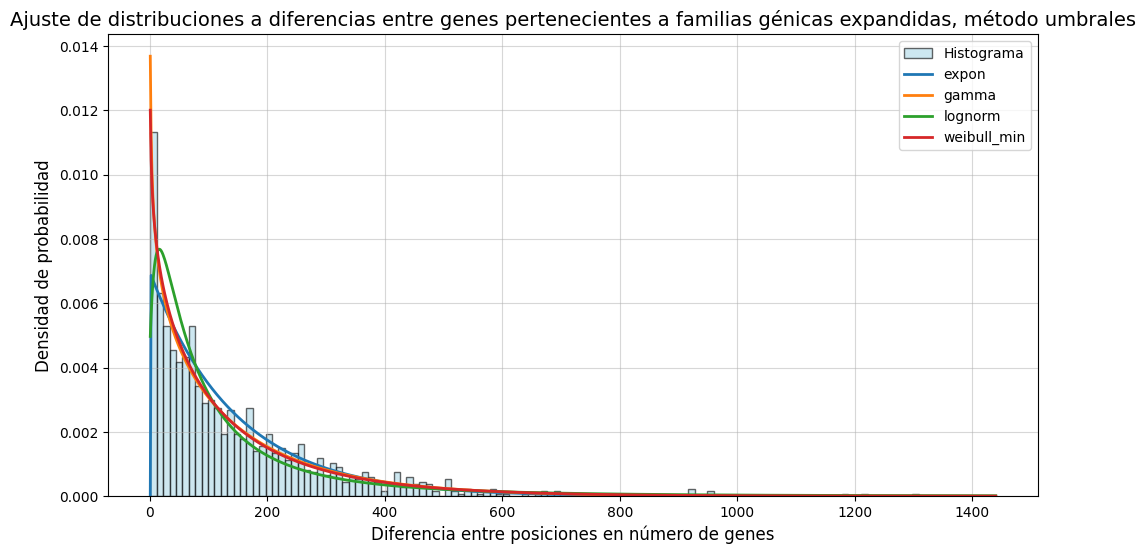

In [44]:
# Crear la lista de diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_num_genes_umbrales.values() for d in diferencias_genoma]
diferencias = np.array(diferencias)

# Filtrar valores no numéricos o extremos (si aplica)
diferencias = diferencias[np.isfinite(diferencias)]
diferencias = diferencias[diferencias > 0]  # Evita problemas con lognorm y gamma

# Definir distribuciones a probar
dist_names = ['expon', 'gamma', 'lognorm', 'weibull_min']
x = np.linspace(min(diferencias) * 0.9, max(diferencias) * 1.1, 1000)  # Expande ligeramente el rango de x

# Diccionario para almacenar los resultados
results = []

# Crear el histograma normalizado
plt.figure(figsize=(12, 6))
count, bins, _ = plt.hist(diferencias, bins=120, density=True, color='lightblue', edgecolor='black', alpha=0.6, label="Histograma")

# Ajustar cada distribución y graficar
for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    
    # Ajuste de parámetros (fuerza loc=0 para gamma y weibull_min si es necesario)
    if dist_name in ['gamma', 'weibull_min']:
        params = dist.fit(diferencias, floc=0)
    else:
        params = dist.fit(diferencias)

    # Validar si los parámetros generan valores razonables
    pdf_fitted = dist.pdf(x, *params)
    if np.any(np.isnan(pdf_fitted)) or np.max(pdf_fitted) > 10 * np.max(count): 
        print(f"Advertencia: {dist_name} tiene un ajuste no válido")
        continue
    
    # Graficar la distribución ajustada
    plt.plot(x, pdf_fitted, label=f"{dist_name}", linewidth=2)

    # Log-verosimilitud para AIC
    loglik = np.sum(dist.logpdf(diferencias, *params))
    k = len(params)  # Número de parámetros
    aic = 2 * k - 2 * loglik

    # Prueba de Kolmogorov-Smirnov
    ks_stat, ks_pvalue = stats.kstest(diferencias, dist_name, args=params)

    # Almacenar los resultados en el diccionario
    results.append({
        "Distribución": dist_name,
        "AIC": round(aic, 2),
        "KS-Statistic": round(ks_stat, 4),
        "KS-pvalue": round(ks_pvalue, 4),
        "Parámetros": np.round(params, 3)
    })

# Mostrar resultados ordenados por AIC
df_resultados = pd.DataFrame(results).sort_values("AIC")
print(df_resultados)

# Mejorar la visualización
plt.title("Ajuste de distribuciones a diferencias entre genes pertenecientes a familias génicas expandidas, método umbrales", fontsize=14)
plt.xlabel("Diferencia entre posiciones en número de genes", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.savefig("resultados/ajuste_diferencias_genes_umbrales_num_genes.png", dpi=150, bbox_inches='tight')  
plt.show()

In [27]:
from scipy import stats
import numpy as np
# Simular algunas diferencias como ejemplo
np.random.seed(42)
diferencias = np.random.gamma(shape=2.0, scale=5.0, size=1000)

# Nombres de distribuciones a ajustar
dist_names = ['norm', 'expon', 'gamma', 'weibull_min']

# Crear figura para los Q-Q plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dist_name in enumerate(dist_names):
    ax = axes[i]
    dist = getattr(stats, dist_name)

    try:
        if dist_name in ['gamma', 'weibull_min']:
            params = dist.fit(diferencias, floc=0)
        else:
            params = dist.fit(diferencias)

        stats.probplot(diferencias, dist=dist, sparams=params, plot=ax)
        ax.set_title(f"Q-Q plot: {dist_name}", fontsize=12)
        ax.grid(True)
    except Exception as e:
        ax.set_title(f"{dist_name} - Error")
        ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=9)
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Q-Q plots para distribuciones ajustadas para umbrales (en número de genes)  ", fontsize=16, y=1.02)

# Guardar la figura
filename_qq = "qq_plots_distribuciones_ajustadas_umbrales_num_genes.png"
full_path_qq = os.path.join(current_dir, filename_qq)
plt.savefig("resultados/qq_plots_num_genes_umbrales.png",dpi =150)
plt.close()

full_path_qq


'/home/jupyter-user6/Notebooks/TESIS/identificar_secundarios/qq_plots_distribuciones_ajustadas_umbrales_num_genes.png'

## Boxplot por genoma

### k-means

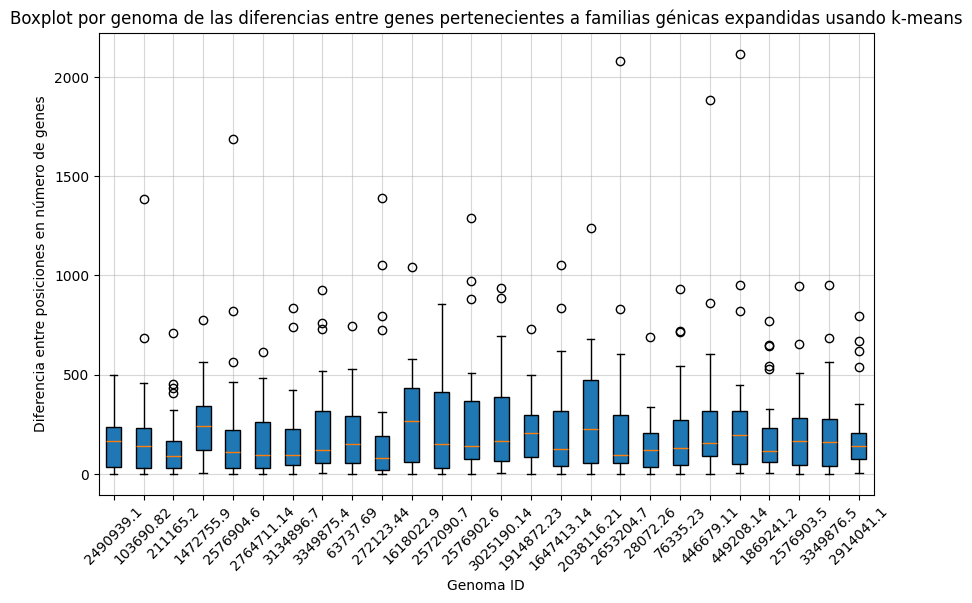

In [45]:
# Crear el box plot
plt.figure(figsize=(10, 6))
plt.boxplot(resultados_diferencias_num_genes_k_means.values(), vert=True, patch_artist=True)
#plt.ylim(bottom=np.percentile(diferencias, 5), top=np.percentile(diferencias, 95))

# Personalización del gráfico
plt.xticks(range(1, len(resultados_diferencias_num_genes_k_means) + 1), resultados_diferencias_num_genes_k_means.keys(), rotation=45)
plt.title("Boxplot por genoma de las diferencias entre genes pertenecientes a familias génicas expandidas usando k-means")
plt.xlabel("Genoma ID")
plt.ylabel("Diferencia entre posiciones en número de genes")
plt.grid(True, alpha=0.5)
plt.savefig("resultados/boxplot_k_means_num_genes.png",dpi =150)
# Mostrar el gráfico
plt.show()

### umbrales

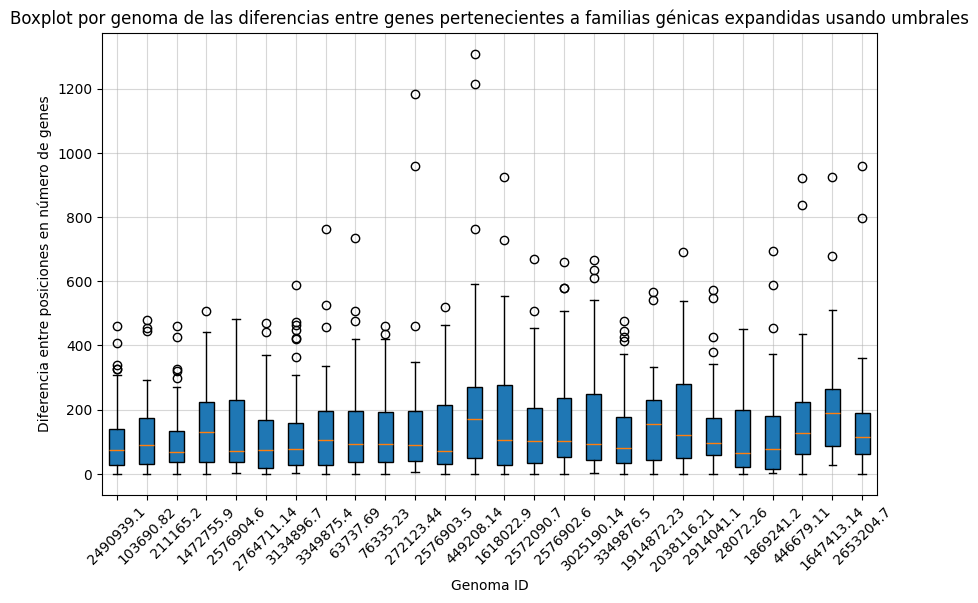

In [46]:
# Crear el box plot
plt.figure(figsize=(10, 6))
plt.boxplot(resultados_diferencias_num_genes_umbrales.values(), vert=True, patch_artist=True)
#plt.ylim(bottom=np.percentile(diferencias, 5), top=np.percentile(diferencias, 95))

# Personalización del gráfico
plt.xticks(range(1, len(resultados_diferencias_num_genes_umbrales) + 1), resultados_diferencias_num_genes_umbrales.keys(), rotation=45)
plt.title("Boxplot por genoma de las diferencias entre genes pertenecientes a familias génicas expandidas usando umbrales")
plt.xlabel("Genoma ID")
plt.ylabel("Diferencia entre posiciones en número de genes")
plt.grid(True, alpha=0.5)

# Mostrar el gráfico
plt.savefig("resultados/box_plots_num_genes_umbrales.png",dpi =150)
plt.show()

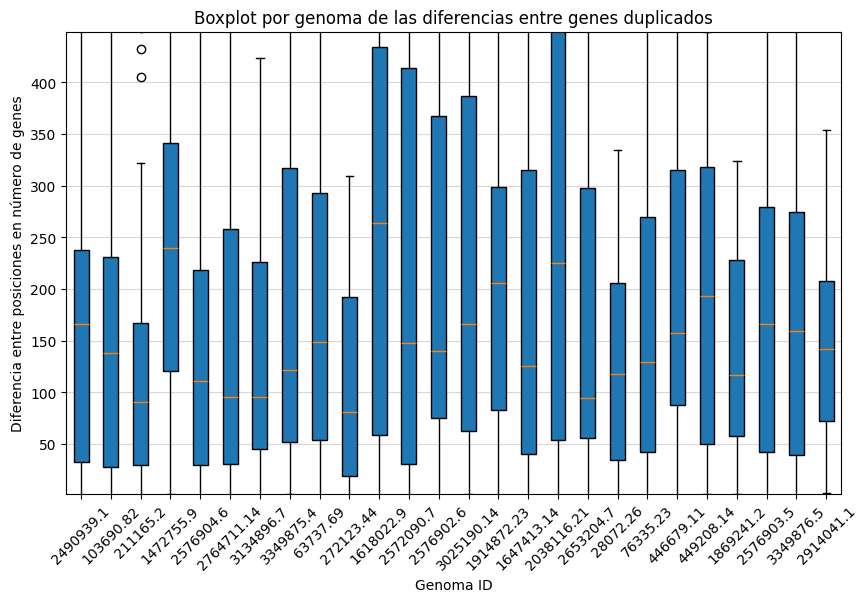

In [47]:
# Crear el box plot
plt.figure(figsize=(10, 6))
plt.boxplot(resultados_diferencias_num_genes_k_means.values(), vert=True, patch_artist=True)
plt.ylim(bottom=np.percentile(diferencias, 5), top=np.percentile(diferencias, 95))

# Personalización del gráfico
plt.xticks(range(1, len(resultados_diferencias_num_genes_k_means) + 1), resultados_diferencias_num_genes_k_means.keys(), rotation=45)
plt.title("Boxplot por genoma de las diferencias entre genes duplicados")
plt.xlabel("Genoma ID")
plt.ylabel("Diferencia entre posiciones en número de genes")
plt.grid(axis="y", alpha=0.5)

# Mostrar el gráfico
plt.show()

In [48]:
%autosave 30

Autosaving every 30 seconds
